1
1
1
1
1.046469666
1.044947754
1.048338979
1.045820092
1.220290755
1.222614297
1.195723665
1.189579543
1.088374371
1.088441801
1.097846976
1.101474491
1.201244868
1.201961981
1.158447513
1.159648563
1.065259394
1.063494276
1.066200261
1.071425026
1.226602354
1.223025188
1.161759297
1.156311054
1.09786521
1.097107283
1.066450554
1.064313615
1.193264524
1.194124163
1.179059897
1.170361225
1.081262376
1.080079914
1.074580819
1.076043693
1.393359136
1.400666465
1.366567845
1.395511162
1.250514984
1.258327406
1.257503414
1.306950274
1.410047258
1.411655629
1.440002459
1.452914817
[[1.         1.         1.         1.        ]
 [1.04646967 1.04494775 1.04833898 1.04582009]
 [1.22029075 1.2226143  1.19572367 1.18957954]
 [1.08837437 1.0884418  1.09784698 1.10147449]
 [1.20124487 1.20196198 1.15844751 1.15964856]
 [1.06525939 1.06349428 1.06620026 1.07142503]
 [1.22660235 1.22302519 1.1617593  1.15631105]
 [1.09786521 1.09710728 1.06645055 1.06431362]
 [1.19326452 1.19412416 1.1790599  1.1703

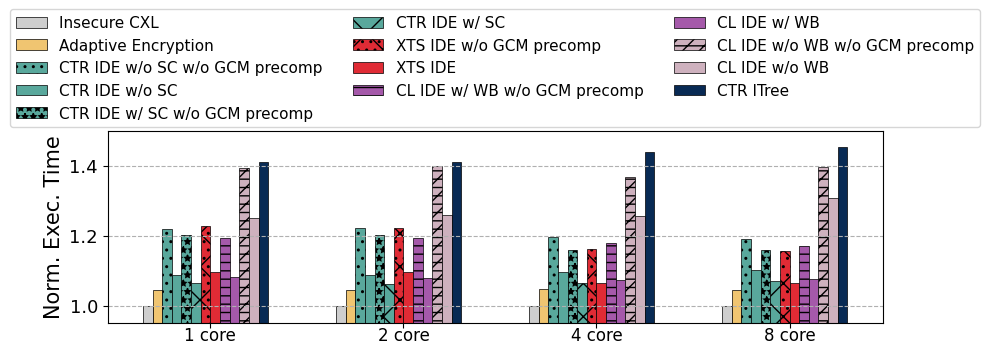

In [15]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl
import itertools
#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=4
x=np.arange(N) 
xclicks=[
    '1 core', '2 core', '4 core', '8 core'
]
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="ablation.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(13, 4)
print(b1)


allfigsize=(10,2.5)     
width=0.05
plt.figure(figsize=allfigsize)

i = (lambda c: lambda: next(c))(itertools.count(0))
j = (lambda c: lambda: next(c))((itertools.count(0)))

print(b1[0])
# plt.bar(x - width*1, b1[0], width, label='w Pre. GCM & Adapt. Encryption', color='#f0c571',hatch="//", edgecolor='black', linewidth=0.5) 
# plt.bar(x , b1[1], width, label='w/o Pre. GCM', color='#a559aa', hatch="x", edgecolor='black', linewidth=0.5)
# plt.bar(x + width*1, b1[2], width, label='w/o Adapt. Encryption',color='#59a89c', hatch="." , edgecolor='black', linewidth=0.5)
off = 13.0 / 2
plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL',color='#cecece', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='Adaptive Encryption',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE w/o SC w/o GCM precomp', color='#59a89c',  hatch="..", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE w/o SC', color='#59a89c' , edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE w/ SC w/o GCM precomp', color='#59a89c', hatch="**", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE w/ SC', color='#59a89c' , hatch="x", edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='XTS IDE w/o GCM precomp', color='#e02b35', hatch="x..",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='XTS IDE', color='#e02b35', hatch="",edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/ WB w/o GCM precomp',  color='#a559aa', hatch="--", edgecolor='black', linewidth=0.5, align='center' )
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/ WB',  color='#a559aa', edgecolor='black', linewidth=0.5, align='center' )

plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/o WB w/o GCM precomp', color='#CEB1BE', hatch="//--",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/o WB', color='#CEB1BE', edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CTR ITree', color='#082a54', edgecolor='black', linewidth=0.5, align='center')



########################################################

########################################################

# plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL ', color='#cecece',edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x + width*(j() - off), b1[i()], width, label='Integrity Tree ', color='#082a54', edgecolor='black', linewidth=0.5, align='center')





plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, va='center_baseline') 
#plt.ylim(0,180000)
plt.ylim(0.95,  1.5)
plt.yticks([1.0,1.2,1.4],fontsize=13)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=15)    
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.50, 1.67), fontsize=11)    
plt.savefig('ablation.pdf',bbox_inches = 'tight')    
plt.show()